# Take-Home Challenge 1: Ultimate Technologies Inc.

## Part 1 Exploratory data analysis
* load basic library
* load dataset "login.json" from local and inspect the content and information

In [59]:
import json
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime
import seaborn as sns

%matplotlib inline

In [410]:
with open('logins.json', 'rb') as f:
    data = json.load(f)
data['login_time'][:5]

['1970-01-01 20:13:18',
 '1970-01-01 20:16:10',
 '1970-01-01 20:16:37',
 '1970-01-01 20:16:36',
 '1970-01-01 20:26:21']

In [3]:
with open('logins.json', 'rb') as f:
    login_df = pd.read_json(f)
print(login_df.head(3))
print(login_df.info())
print(login_df.describe())

           login_time
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB
None
                 login_time
count                 93142
unique                92265
top     1970-02-12 11:16:53
freq                      3
first   1970-01-01 20:12:16
last    1970-04-13 18:57:38


In [4]:
login_df['count'] = 1
print(login_df.info())
print(login_df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
 1   count       93142 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.4 MB
None
           login_time  count
0 1970-01-01 20:13:18      1
1 1970-01-01 20:16:10      1
2 1970-01-01 20:16:37      1
3 1970-01-01 20:16:36      1
4 1970-01-01 20:26:21      1


In [5]:
login_df_15min_interval = login_df.groupby(pd.Grouper(key='login_time', freq='15min')).count()
print(login_df_15min_interval.head(5))
login_df_15min_interval['date'] = login_df_15min_interval.index.date
login_df_15min_interval['time'] = login_df_15min_interval.index.time
login_df_15min_interval1 = login_df_15min_interval.groupby('time').sum()

                     count
login_time                
1970-01-01 20:00:00      2
1970-01-01 20:15:00      6
1970-01-01 20:30:00      9
1970-01-01 20:45:00      7
1970-01-01 21:00:00      1


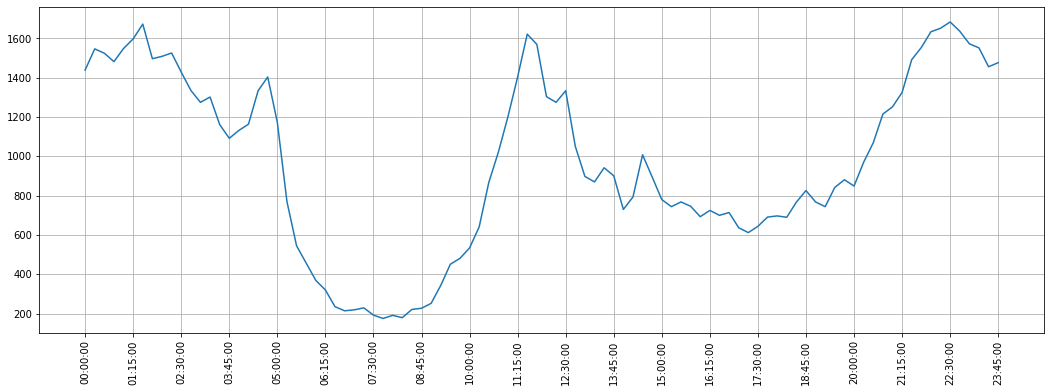

In [6]:
plt.figure(figsize=(18, 6))
plt.plot(login_df_15min_interval1.index.astype(str), login_df_15min_interval1['count'])
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(24))
plt.xticks(rotation=90)
plt.grid(True)

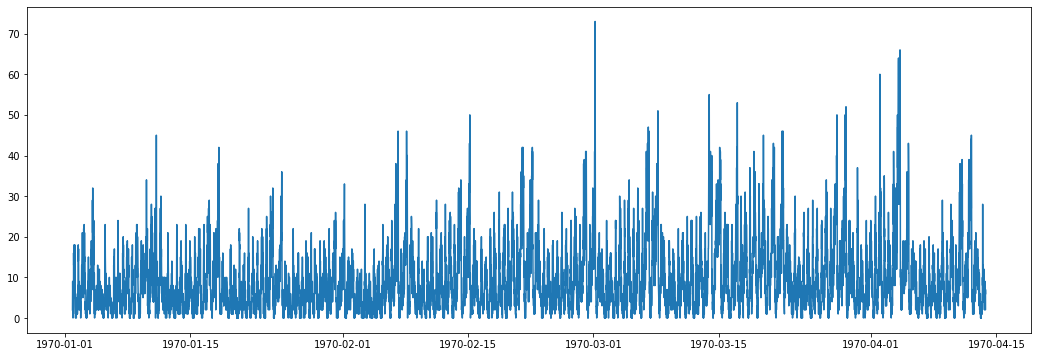

In [7]:
plt.figure(figsize=(18,6))
plt.plot(login_df_15min_interval.index, login_df_15min_interval['count'])
# login_df['login_time']

### Part 1 Report:

1. the underlying demand patterns: According to the 15-minutes time intervals, the highest demand appears at 1:30am, 11:20am, and 22:30pm, this three time-slots. And during the early morning, from 2:30 to 7:30am, the login decline to the lowest rate.
2. data quality: the data set contains 93142 non-null entries, so there is no Null entries. only one column, which contains datetime type values. The data span is from Jan 1, 1970 to April 13, 1970

## Part 2: Experiment and metrics design


### Part 2 Report 
1. I would like to use the amount of serve between the two cities as the primary measure to illustrate the effect of my experiment in encouraging driver partners to serve both cities, because the total number of serving between the two cities could reflect the effect of the experment. If after the experiment, the total amount of serving restore to the level of usage before the toll bridges
2. a: I suggest to implement the experiment by reimbursing the first toll costs from Gothm to Metropolis, and the first toll cost from Metropolis to Gothm after 7pm for the same day. Also I suggest to afford the toll cost from Gothm to Metropolis after 11pm in the same day.<br>
   b: A/B test would be a choice to check the result.<br>
   c: ?

## Part 3: Predictive modeling

In [8]:
with open('ultimate_data_challenge.json', 'rb') as f:
    ultimate_df = pd.read_json(f)
print(ultimate_df.info())
print(ultimate_df.describe())
print(ultimate_df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB
None
       trips_in_first_30_days  avg_rating_of_driver     avg_surge  \
coun

### 3.1. cleaning, exploratory analysis, visualizations

In [9]:
from sklearn.preprocessing import OneHotEncoder

In [10]:
ultimate_df

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


### 3.1-a: check the city
* The dataset is pulled from three cities
* King's Landing had the highest pcercentage of users among the threes cities, while people in Winterfell has less interest in Ultimate's rider website.

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64
["King's Landing" 'Astapor' 'Winterfell']


<BarContainer object of 3 artists>

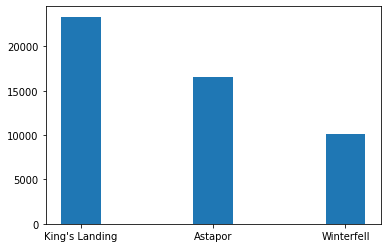

In [11]:
print(ultimate_df['city'].value_counts())
print(ultimate_df['city'].unique())
plt.bar(ultimate_df['city'].unique(), ultimate_df['city'].value_counts(), width=0.3)

### 3.1-b: check the phone, fill the Null with other
* There are two main types of phone, iphone, android
* There are 396 rows missing phone types, we fill the null cell with 'other'

In [12]:
print(ultimate_df['phone'].value_counts(), "\n")
print("The total Null phone column is:", len(ultimate_df['phone'][ultimate_df['phone'].isna()]), "\n")
print(ultimate_df['phone'].unique())

iPhone     34582
Android    15022
Name: phone, dtype: int64 

The total Null phone column is: 396 

['iPhone' 'Android' None]


In [13]:
ultimate_df['phone'] = ultimate_df['phone'].fillna('other')
print(ultimate_df['phone'].value_counts(), "\n")
print("The total Null phone column is:", len(ultimate_df['phone'][ultimate_df['phone'].isna()]), "\n")

iPhone     34582
Android    15022
other        396
Name: phone, dtype: int64 

The total Null phone column is: 0 



<BarContainer object of 3 artists>

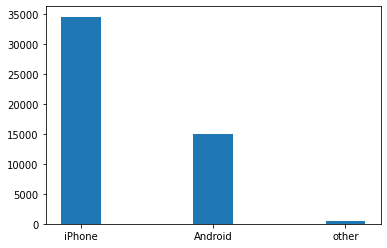

In [14]:
plt.bar(ultimate_df['phone'].unique(), ultimate_df['phone'].value_counts(), width=0.3)

### 3.1-c:  check signup_date and last_trip_date
* The datatset is a clips from Jan-01, 2014 to July-01, 2014
* There were 73.9% users still active after register 30days later
* The retained percentage is about 37.6%, according to the last 30 days activities from July-01, 2014

In [15]:
print(len(ultimate_df['signup_date'].isna()))
print(len(ultimate_df['last_trip_date'].isna()))

50000
50000


In [16]:
ultimate_df['last_trip_date'] = ultimate_df['last_trip_date'].astype('datetime64')
ultimate_df['signup_date'] = ultimate_df['signup_date'].astype('datetime64')
ultimate_df['active_duration'] = ultimate_df['last_trip_date'] - ultimate_df['signup_date']
t = len(ultimate_df[ultimate_df['active_duration'] > datetime.timedelta(30)]) \
    / len(ultimate_df)
print("The pcercentage that people still active after register 30days later is: ", t)

The pcercentage that people still active after register 30days later is:  0.73946


In [17]:
print(ultimate_df['last_trip_date'].describe())
ultimate_df['latest_idle_days'] = max(ultimate_df['last_trip_date']) - ultimate_df['last_trip_date']
ultimate_df['latest_idle_days'] = ultimate_df['latest_idle_days'].dt.days
ultimate_df['retained'] = np.where(ultimate_df['latest_idle_days'] > 30, 0, 1)
print(ultimate_df[['retained', 'latest_idle_days']].head(5)) 
print("The fraction of the observed users were retained is:", ultimate_df['retained'].sum()/len(ultimate_df))

count                   50000
unique                    182
top       2014-06-29 00:00:00
freq                     2036
first     2014-01-01 00:00:00
last      2014-07-01 00:00:00
Name: last_trip_date, dtype: object
   retained  latest_idle_days
0         1                14
1         0                57
2         0               175
3         1                 2
4         0               108
The fraction of the observed users were retained is: 0.37608


### 3.1-d: check avg_rating_by_driver and avg_rating_of_driver
* avg_rating_by_driver has 201 Null cells, we fill the Nan with the mean rating values
* avg_rating_of_driver has 8122 Null cells, we fill the Nan with mean rating values
* the rating distribution is not normalized, the most rating is among 4.9-and-up, we use pd.cut to reconstruct the bins

In [18]:
ultimate_df[['avg_rating_by_driver', 'avg_rating_of_driver']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   avg_rating_by_driver  49799 non-null  float64
 1   avg_rating_of_driver  41878 non-null  float64
dtypes: float64(2)
memory usage: 781.4 KB


In [19]:
ultimate_df[ultimate_df['avg_rating_by_driver'].isna()][['avg_rating_by_driver', 'avg_rating_of_driver']]

,avg_rating_by_driver,avg_rating_of_driver
90,NaN,5.0
274,NaN,2.0
277,NaN,NaN
536,NaN,5.0
857,NaN,4.0
...,...,...
49249,NaN,5.0
49376,NaN,4.0
49504,NaN,5.0
49599,NaN,5.0


In [20]:
# fill 'avg_rating_by_driver' nan with mean
ultimate_df.loc[ultimate_df['avg_rating_by_driver'].isna(), 'avg_rating_by_driver'] =  ultimate_df['avg_rating_by_driver'].mean()
ultimate_df.loc[ultimate_df['avg_rating_of_driver'].isna(), 'avg_rating_of_driver'] =  ultimate_df['avg_rating_of_driver'].mean()
len(ultimate_df[ultimate_df['avg_rating_by_driver'].isna()])
len(ultimate_df[ultimate_df['avg_rating_of_driver'].isna()])

0

In [21]:
ultimate_df[['avg_rating_by_driver', 'avg_rating_of_driver']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   avg_rating_by_driver  50000 non-null  float64
 1   avg_rating_of_driver  50000 non-null  float64
dtypes: float64(2)
memory usage: 781.4 KB


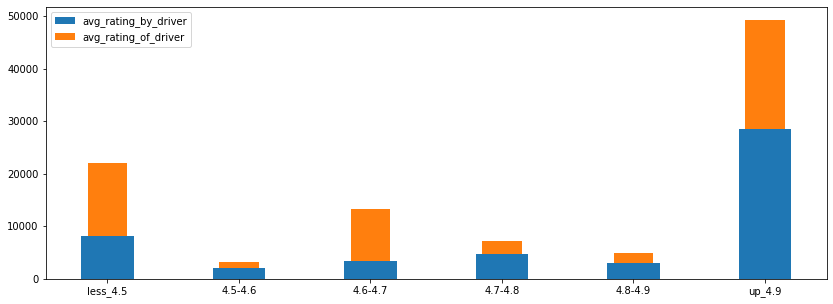

In [22]:
plt.figure(figsize=(14, 5))
# plt.bar(ultimate_df['avg_rating_by_driver'].unique(), 
#         ultimate_df['avg_rating_by_driver'].value_counts(), 
#         width=0.3)

# plt.bar(ultimate_df['avg_rating_of_driver'].unique(), 
#         ultimate_df['avg_rating_of_driver'].value_counts(), 
#         color='g', 
#         width=0.2)
bin_range = [0, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0]
bin_labels = ['less_4.5', '4.5-4.6', '4.6-4.7', '4.7-4.8', '4.8-4.9', 'up_4.9']
x = pd.cut(ultimate_df['avg_rating_by_driver'], bins=bin_range, labels=bin_labels)
y = pd.cut(ultimate_df['avg_rating_of_driver'], bins=bin_range, labels=bin_labels)
x = x.value_counts().sort_index()
y = y.value_counts().sort_index()
plt1 = plt.bar(x.index, x.values, width=0.4)
plt2 = plt.bar(y.index, y.values, width=0.3, bottom=x.values)

plt.legend((plt1, plt2), ('avg_rating_by_driver', 'avg_rating_of_driver'))

In [23]:
ultimate_df

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_duration,latest_idle_days,retained
0,King's Landing,4,2014-01-25,4.700000,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,143 days,14,1
1,Astapor,0,2014-01-29,5.000000,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,96 days,57,0
2,Astapor,3,2014-01-06,4.300000,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1 days,175,0
3,King's Landing,9,2014-01-10,4.600000,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,170 days,2,1
4,Winterfell,14,2014-01-27,4.400000,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,47 days,108,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.000000,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,131 days,26,1
49996,Astapor,1,2014-01-24,4.601559,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,1 days,157,0
49997,Winterfell,0,2014-01-31,5.000000,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,111 days,40,0
49998,Astapor,2,2014-01-14,3.000000,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5,1 days,167,0


### 3.1-e: check ultimate_black_user
* this is a boolean variable, no Null cells
* plot the bar to check the distribution, the ultimate_black_user rate is about 40%
* convert boolean to 1/0

In [77]:
ultimate_df.loc[:, 'ultimate_black_user'] = np.where(ultimate_df['ultimate_black_user'], 1, 0)

In [78]:
ultimate_df['ultimate_black_user'].value_counts()

0    31146
1    18854
Name: ultimate_black_user, dtype: int64

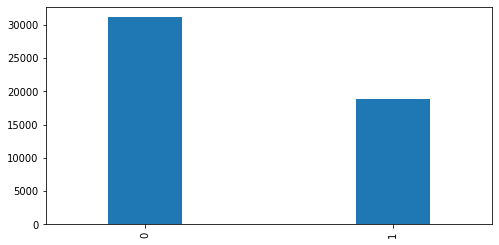

In [79]:
plt.figure(figsize=(8,4))
ultimate_df['ultimate_black_user'].value_counts().plot(kind='bar', width=0.3)

### 3.1-f: check avg_dist and trips_in_first_30_days
* the average trip distance is 5.79, with a great amount of people who did not take any trip after registering.
* two persons reached more than 100 miles per trip, tha max is 160.96 miles
* 'trips_in_first_30_days', this shows trip times in 30 days after people registering. About 15390 people who did not take any trip even though they registered.
* one peoson travels more than 100 times in first 30 days after registering

In [26]:
ultimate_df[['avg_dist', 'trips_in_first_30_days']].describe()

,avg_dist,trips_in_first_30_days
count,50000.000000,50000.000000
mean,5.796827,2.278200
std,5.707357,3.792684
min,0.000000,0.000000
25%,2.420000,0.000000
50%,3.880000,1.000000
75%,6.940000,3.000000
max,160.960000,125.000000


(array([2.4100e+02, 4.3000e+01, 6.9500e+02, 5.8270e+03, 1.8391e+04,
        1.5006e+04, 7.5300e+03, 2.0920e+03, 1.7000e+02, 5.0000e+00]),
 array([-2.30258509, -1.56414889, -0.82571268, -0.08727648,  0.65115973,
         1.38959594,  2.12803214,  2.86646835,  3.60490455,  4.34334076,
         5.08177697]),
 <a list of 10 Patch objects>)

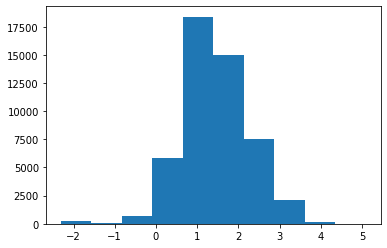

In [27]:
plt.hist(np.log(ultimate_df['avg_dist']+0.1))

In [28]:
ultimate_df[ultimate_df['avg_dist'] > 100]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_duration,latest_idle_days,retained
534,King's Landing,0,2014-01-04,4.601559,1.0,2014-03-09,other,0.0,False,0.0,129.89,5.000000,64 days,114,0
20701,Astapor,0,2014-01-25,4.601559,1.0,2014-06-26,Android,0.0,False,100.0,160.96,4.778158,152 days,5,1


(array([1.5390e+04, 0.0000e+00, 0.0000e+00, 1.4108e+04, 1.1190e+04,
        6.1310e+03, 2.2460e+03, 8.2500e+02, 1.0600e+02, 4.0000e+00]),
 array([-2.30258509, -1.58941524, -0.87624539, -0.16307554,  0.55009431,
         1.26326416,  1.97643401,  2.68960386,  3.40277372,  4.11594357,
         4.82911342]),
 <a list of 10 Patch objects>)

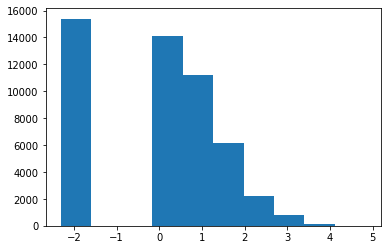

In [29]:
plt.hist(np.log(ultimate_df['trips_in_first_30_days']+ 0.1))

In [30]:
len(ultimate_df[ultimate_df['trips_in_first_30_days'] == 0])

15390

In [31]:
len(ultimate_df[ultimate_df['trips_in_first_30_days'] > 80])

1

### 3.1-g: check avg_surge and surge_pct
* About 68.8% user did not use surge. most users' avg_surge is 1
* convert surge_pct to 0~1 by divided 100
* max avg_surge is 8.0

In [32]:
print(ultimate_df[['avg_surge', 'surge_pct']].info())
print(ultimate_df[['avg_surge', 'surge_pct']].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   avg_surge  50000 non-null  float64
 1   surge_pct  50000 non-null  float64
dtypes: float64(2)
memory usage: 781.4 KB
None
          avg_surge     surge_pct
count  50000.000000  50000.000000
mean       1.074764      8.849536
std        0.222336     19.958811
min        1.000000      0.000000
25%        1.000000      0.000000
50%        1.000000      0.000000
75%        1.050000      8.600000
max        8.000000    100.000000


In [33]:
print(ultimate_df['surge_pct'].value_counts())
print(len(ultimate_df[ultimate_df['surge_pct'] == 0]) / len(ultimate_df))

0.0      34409
100.0     1416
50.0      1367
33.3      1152
25.0       906
         ...  
27.9         1
34.7         1
62.5         1
29.3         1
26.4         1
Name: surge_pct, Length: 367, dtype: int64
0.68818


In [34]:
ultimate_df['surge_pct'] = ultimate_df['surge_pct'] / 100.0

<BarContainer object of 115 artists>

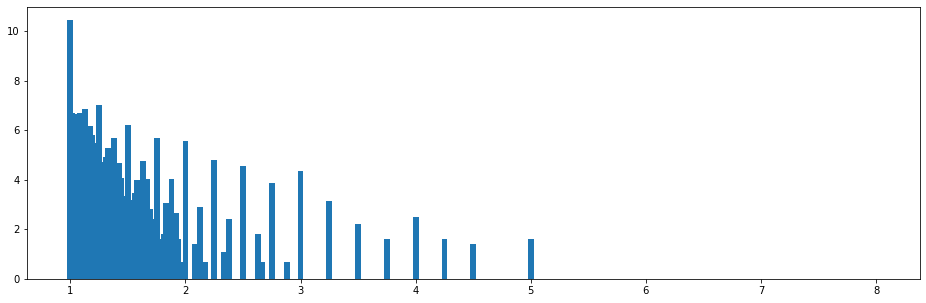

In [35]:
plt.figure(figsize=(16, 5))
x = ultimate_df['avg_surge'].value_counts().sort_index()
plt.bar(x.index, np.log(x.values), width=0.05)

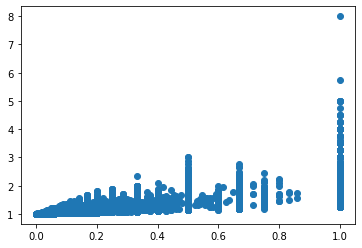

In [36]:
plt.scatter(ultimate_df['surge_pct'], ultimate_df['avg_surge'])

### 3.1-h: check weekday_pct
* 16659 users took trips only during weekday, while 9203 users prefer to use the app during weekend. These two groups take up almost 52% of all register users. 
* convert to 0~1, normalized

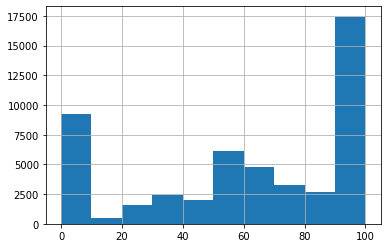

In [37]:
ultimate_df['weekday_pct'].hist()

In [38]:
ultimate_df['weekday_pct'].value_counts()

100.0    16659
0.0       9203
50.0      4057
66.7      2088
33.3      1619
         ...  
5.9          1
93.2         1
42.6         1
39.0         1
49.1         1
Name: weekday_pct, Length: 666, dtype: int64

In [39]:
ultimate_df['weekday_pct'] = ultimate_df['weekday_pct'] / 100.0

In [40]:
ultimate_df['weekday_pct'].value_counts()

1.000    16659
0.000     9203
0.500     4057
0.667     2088
0.333     1619
         ...  
0.770        1
0.678        1
0.819        1
0.953        1
0.351        1
Name: weekday_pct, Length: 666, dtype: int64

In [41]:
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   city                    50000 non-null  object         
 1   trips_in_first_30_days  50000 non-null  int64          
 2   signup_date             50000 non-null  datetime64[ns] 
 3   avg_rating_of_driver    50000 non-null  float64        
 4   avg_surge               50000 non-null  float64        
 5   last_trip_date          50000 non-null  datetime64[ns] 
 6   phone                   50000 non-null  object         
 7   surge_pct               50000 non-null  float64        
 8   ultimate_black_user     50000 non-null  bool           
 9   weekday_pct             50000 non-null  float64        
 10  avg_dist                50000 non-null  float64        
 11  avg_rating_by_driver    50000 non-null  float64        
 12  active_duration         50000 no

In [42]:
ultimate_df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,active_duration,latest_idle_days,retained
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000,50000.000000,50000.000000
mean,2.278200,4.601559,1.074764,0.088495,0.609261,5.796827,4.778158,92 days 18:57:44.640000,72.665220,0.376080
std,3.792684,0.564977,0.222336,0.199588,0.370815,5.707357,0.445753,62 days 03:06:56.580842,61.718985,0.484405
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0 days 00:00:00,0.000000,0.000000
25%,0.000000,4.500000,1.000000,0.000000,0.333000,2.420000,4.700000,27 days 00:00:00,13.000000,0.000000
50%,1.000000,4.700000,1.000000,0.000000,0.667000,3.880000,5.000000,110 days 00:00:00,54.000000,0.000000
75%,3.000000,5.000000,1.050000,0.086000,1.000000,6.940000,5.000000,150 days 00:00:00,137.000000,1.000000
max,125.000000,5.000000,8.000000,1.000000,1.000000,160.960000,5.000000,181 days 00:00:00,181.000000,1.000000


In [43]:
ultimate_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_duration,latest_idle_days,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,0.154,True,0.462,3.67,5.0,143 days,14,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.000,False,0.500,8.26,5.0,96 days,57,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.000,False,1.000,0.77,5.0,1 days,175,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,0.200,True,0.800,2.36,4.9,170 days,2,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,0.118,False,0.824,3.13,4.9,47 days,108,0


In [47]:
corr = ultimate_df.corr()
corr

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,latest_idle_days,retained
trips_in_first_30_days,1.000000,-0.011060,-0.001841,0.005720,0.112210,0.050388,-0.136329,-0.039097,-0.167633,0.210463
avg_rating_of_driver,-0.011060,1.000000,-0.021653,-0.003290,-0.001916,0.012587,0.028508,0.101660,0.014434,-0.010829
avg_surge,-0.001841,-0.021653,1.000000,0.793582,-0.078791,-0.110071,-0.081491,0.010498,0.017906,-0.003333
surge_pct,0.005720,-0.003290,0.793582,1.000000,-0.106861,-0.144918,-0.104414,0.019964,-0.004332,0.011797
ultimate_black_user,0.112210,-0.001916,-0.078791,-0.106861,1.000000,0.035998,0.032310,0.009328,-0.165084,0.205002
weekday_pct,0.050388,0.012587,-0.110071,-0.144918,0.035998,1.000000,0.101652,0.020366,-0.021589,0.009693
avg_dist,-0.136329,0.028508,-0.081491,-0.104414,0.032310,0.101652,1.000000,0.079793,0.107710,-0.092780
avg_rating_by_driver,-0.039097,0.101660,0.010498,0.019964,0.009328,0.020366,0.079793,1.000000,0.032556,-0.026748
latest_idle_days,-0.167633,0.014434,0.017906,-0.004332,-0.165084,-0.021589,0.107710,0.032556,1.000000,-0.780837
retained,0.210463,-0.010829,-0.003333,0.011797,0.205002,0.009693,-0.092780,-0.026748,-0.780837,1.000000


Text(0.5, 1.05, 'Correlation Matrix, fontsize=16')

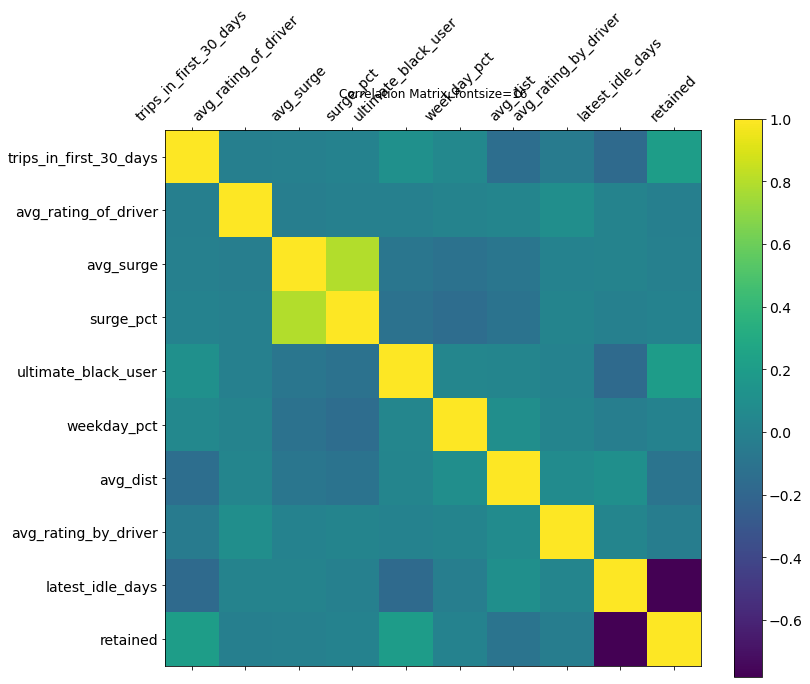

In [58]:
f = plt.figure(figsize=(12, 10))
plt.matshow(corr, fignum=f.number)
plt.xticks(range(corr.shape[1]), corr.columns, fontsize=14, rotation=45)
plt.yticks(range(corr.shape[1]), corr.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title("Correlation Matrix, fontsize=16")

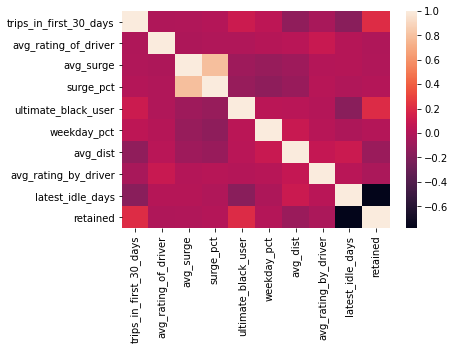

In [60]:
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

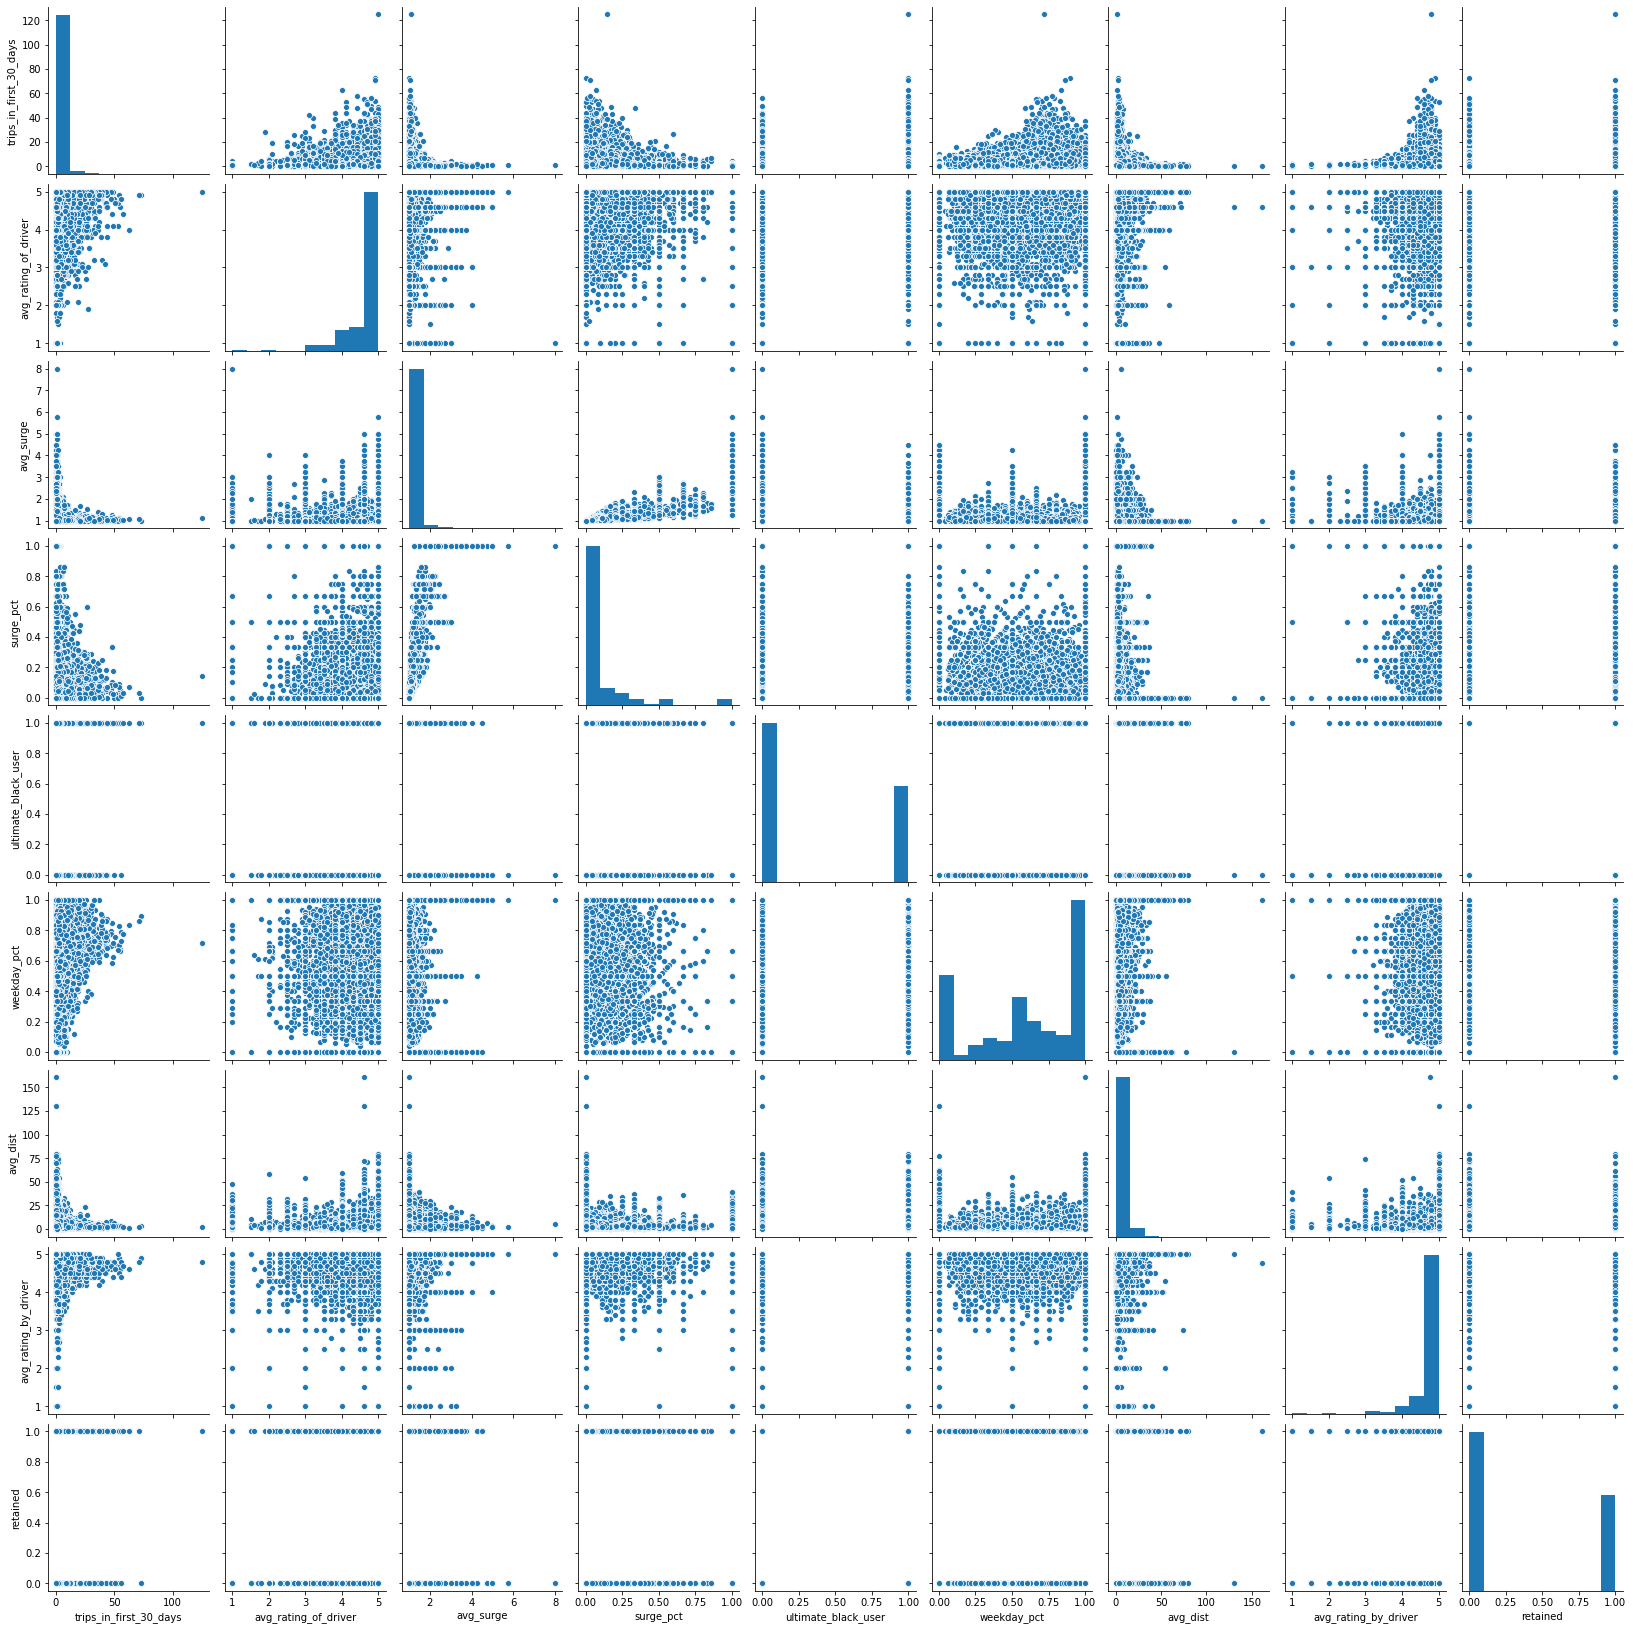

In [72]:
# 
t = ultimate_df[['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 
      'ultimate_black_user', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver', 'retained']]
t.loc[:, 'ultimate_black_user'] = np.where(t['ultimate_black_user'], 1, 0)

sns.pairplot(t)


In [69]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  50000 non-null  int64  
 1   avg_rating_of_driver    50000 non-null  float64
 2   avg_surge               50000 non-null  float64
 3   surge_pct               50000 non-null  float64
 4   ultimate_black_user     50000 non-null  bool   
 5   weekday_pct             50000 non-null  float64
 6   avg_dist                50000 non-null  float64
 7   avg_rating_by_driver    50000 non-null  float64
 8   retained                50000 non-null  int64  
dtypes: bool(1), float64(6), int64(2)
memory usage: 3.1 MB


## 3.2 Build a predictive model

In [403]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [385]:
# seperate columns to apply different transform
# categorical -> ohe
# numerical -> standardScalar
# others -> do not transform
categoraical_columns = ['city', 'phone']
numerical_columns = ['trips_in_first_30_days', 
                     'avg_rating_of_driver', 
                     'avg_rating_by_driver', 
                     'avg_surge',
                     'avg_dist']
remain_columns = ['surge_pct',
                  'ultimate_black_user',
                  'weekday_pct']

In [386]:
# define categorical variables pipeline: ohe
categorical_pipe = Pipeline([
    ('ohe', OneHotEncoder())                        
])

In [387]:
# define numerical variables pipeline: StandardScaler
numerical_pipe = Pipeline([
    ('scalar', StandardScaler())
])

In [388]:
get_remaining_pipe = FunctionTransformer(lambda x: x.loc[:, remain_columns])

In [389]:
# Using "ColumnTransformer" to make preprocessing transform
preprocessing = ColumnTransformer([
    ('cat', categorical_pipe, categoraical_columns),
    ('num', numerical_pipe, numerical_columns)
])

In [390]:
union_features = FeatureUnion([
    ('prossed', preprocessing),
    ('direct', get_remaining_pipe)
])

In [391]:
# do preprocessing
preprocessed_array = preprocessing.fit_transform(ultimate_df)
ohe_feature_names = preprocessing.named_transformers_['cat']['ohe'].get_feature_names()
preprocessed_array.shape

(50000, 11)

In [392]:
# get results and columns
input_arry = np.hstack((preprocessed_array, ultimate_df[remain_columns].values))
input_arry_feature_names = np.hstack((ohe_feature_names,
                                     numerical_columns,
                                     remain_columns))
input_df = pd.DataFrame(input_arry, columns=input_arry_feature_names)
input_df.shape

(50000, 14)

In [393]:
# get target
target = ultimate_df['retained'].values
target.shape

(50000,)

In [394]:
x_train, x_test, y_train, y_test = train_test_split(ultimate_df, target, random_state=42)

In [395]:
rf = Pipeline([
    ('union', union_features),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [396]:
param_grid = {'classifier__n_estimators': [30, 50, 60],
              'classifier__max_depth': [8, 9, 10, 11, 20],
              'classifier__max_features': ['auto', 'sqrt', 'log2']}
gs = GridSearchCV(rf, param_grid, cv=5, scoring='f1')

In [397]:
gs.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('union',
                                        FeatureUnion(transformer_list=[('prossed',
                                                                        ColumnTransformer(transformers=[('cat',
                                                                                                         Pipeline(steps=[('ohe',
                                                                                                                          OneHotEncoder())]),
                                                                                                         ['city',
                                                                                                          'phone']),
                                                                                                        ('num',
                                                                                                         Pipeline(steps=[('

In [398]:
gs.best_score_

0.694653251519213

In [399]:
gs.best_params_

{'classifier__max_depth': 11,
 'classifier__max_features': 'auto',
 'classifier__n_estimators': 50}

In [271]:
np.round(gs.best_estimator_[1][1].feature_importances_, 3)

array([0.09 , 0.049, 0.019, 0.027, 0.043, 0.001, 0.063, 0.04 , 0.253,
       0.036, 0.094, 0.117, 0.065, 0.103])

In [308]:
feature_importances.columns.to_flat_index

(14,)

In [325]:
feature_importances = pd.DataFrame([np.round(gs.best_estimator_[1][1].feature_importances_, 3)], 
                                   columns=input_arry_feature_names).sort_values(by=0, axis=1, ascending=False)
feature_importances

,avg_rating_by_driver,surge_pct,weekday_pct,avg_dist,x0_Astapor,ultimate_black_user,trips_in_first_30_days,x0_King's Landing,x1_iPhone,avg_rating_of_driver,avg_surge,x1_Android,x0_Winterfell,x1_other
0,0.253,0.117,0.103,0.094,0.09,0.065,0.063,0.049,0.043,0.04,0.036,0.027,0.019,0.001


<BarContainer object of 14 artists>

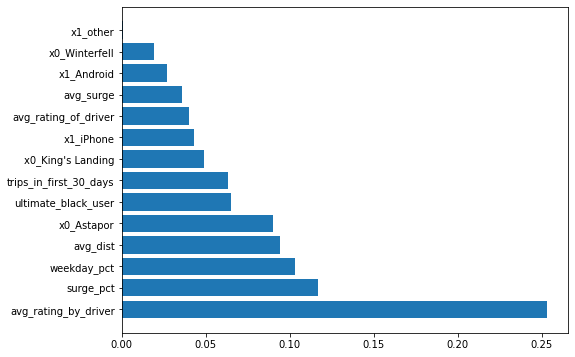

In [332]:
plt.figure(figsize=(8, 6))
plt.barh(feature_importances.columns, feature_importances.values.reshape(14,))

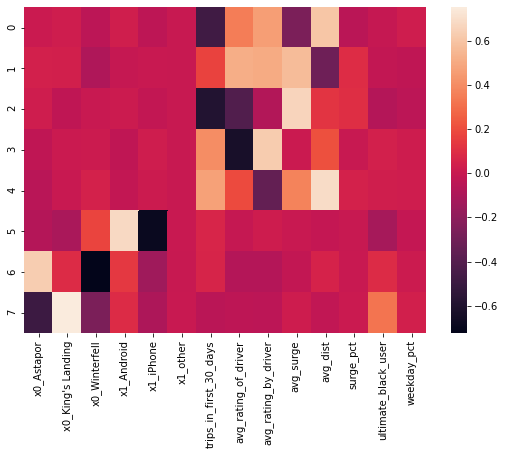

In [362]:
pca = PCA(n_components=8)
pca.fit_transform(input_df).shape
pca_feature = pd.DataFrame(pca.components_, columns=input_arry_feature_names)
pca_feature
plt.figure(figsize=(9,6))
sns.heatmap(pca_feature)

In [374]:
rf = RandomForestClassifier(random_state=42)
clr = LogisticRegression(random_state=42)
pca = PCA()

numerical_pipe = Pipeline([
    ('scalar', StandardScaler())
])

col_transed = ColumnTransformer([
    ('num', numerical_pipe, numerical_columns)
])

col_direct = FunctionTransformer(lambda x: x.loc[:, remain_columns])

union_features = FeatureUnion([
    ('col_trans', col_transed),
    ('col_remains', col_direct)
])

rf_pipe = Pipeline([
    ('union' ,union_features),
    ('rf', rf)
])

pca_clr_pipe = Pipeline([
    ('union', union_features),
    ('pca', pca),
    ('clr', clr)    
])

In [375]:
params_rf = {
    'rf__n_estimators': [10, 20, 30, 50, 60, 100],
    'rf__max_depth': [8, 9, 10, 11, 20],
    'rf__max_features': [None, 'auto', 'sqrt', 'log2']
}
gscv_rf = GridSearchCV(estimator=rf_pipe, param_grid=params_rf, cv=5, scoring='f1', verbose=1)

In [376]:
params_clr = {
    'pca__n_components': [5, 6, 7, 8],
    'clr__C': [0.1, 10, 100]
}
gscv_clr = GridSearchCV(estimator=pca_clr_pipe, param_grid=params_clr, cv=5, scoring='f1', verbose=1)

In [377]:
gscv_rf.fit(x_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  9.3min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('union',
                                        FeatureUnion(transformer_list=[('col_trans',
                                                                        ColumnTransformer(transformers=[('num',
                                                                                                         Pipeline(steps=[('scalar',
                                                                                                                          StandardScaler())]),
                                                                                                         ['trips_in_first_30_days',
                                                                                                          'avg_rating_of_driver',
                                                                                                          'avg_rating_by_driver',
                                                                    

In [378]:
gscv_clr.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    4.3s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('union',
                                        FeatureUnion(transformer_list=[('col_trans',
                                                                        ColumnTransformer(transformers=[('num',
                                                                                                         Pipeline(steps=[('scalar',
                                                                                                                          StandardScaler())]),
                                                                                                         ['trips_in_first_30_days',
                                                                                                          'avg_rating_of_driver',
                                                                                                          'avg_rating_by_driver',
                                                                    

In [380]:
print('rf best score is: ', gscv_rf.best_score_)
print('clr with pca best score is: ', gscv_clr.best_score_)

rf best score is:  0.644038662506288
clr with pca best score is:  0.40916155323807135


In [381]:
print('rf best params is: ', gscv_rf.best_params_)
print('clr with pca best params is: ', gscv_clr.best_params_)

rf best params is:  {'rf__max_depth': 11, 'rf__max_features': 'log2', 'rf__n_estimators': 60}
clr with pca best params is:  {'clr__C': 10, 'pca__n_components': 8}


In [406]:
pred = gs.best_estimator_.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      7800
           1       0.73      0.65      0.69      4700

    accuracy                           0.78     12500
   macro avg       0.77      0.76      0.76     12500
weighted avg       0.78      0.78      0.78     12500



## 3.2 report
1. first I visualize the dataset, but do not find any correlation between variables according to heatmap, corr matrix, so there is no linear or non-linear relation between variables and target label
2. In that way, I think RandomForest maybe a better choice, which is better in non-linear relation prediction.
3. I also try PCA to decrease the dimensions, but the result get worse.
4. I think I colud try xgboost which maybe enhance the performance
5. Since there is less positive label than negative labels (37%), so it's better to collect more positive data.
6. since the data is only collect in Jan, during winter time, there may be seasonal variance, so it's better to collect the whole year's data for further research.
7. The model only achieve 78% accuracy result, which is not so descent, with precision and recall are also 78%. So the model could be valid, not overfit on training data.

## 3.3 report 
1. according to the result, we can find the most importance features in the dataset are: avg_rating_by_driver, weekday_pct, avg_dist, surge_pct, ultimate_black_user and so on, so it's better to improve the information which related to these areas. In that way, we could get more accurate result.
2. Also, taking marketing campaign to increase driver's rating or increase the providing of service during weekday to serve more people maybe another choice.